In [1]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torch
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
from dataset import tgenerator
import sklearn

seed = 42

np.random.seed(seed)                                                                       
torch.manual_seed(seed) 

img_transform = transforms.Compose([transforms.Resize(255),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0, 0, 0], std=[1, 1, 1])]
                                   )
dataset = ImageFolder(root='/Users/jlakkis/Downloads/plant-seedlings-classification/train', transform=img_transform)

train_indices, tune_indices = sklearn.model_selection.train_test_split(np.arange(len(dataset)), 
                                                                       test_size=.1, random_state=seed)
print(dataset.classes)

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


In [2]:
def getnewmatrix(ds):
    '''
    Takes in all necessary parameters to train the model and returns the model and the loss curves.

    Args:
      num_epochs: Number of epochs to train for 
      dataloader: The training dataloader object that was given in the helper code 
      model: The autoencoder model from the class
      criterion: Loss criterion
      Optimizer: Optimizer to be used 
    Returns:
      model: trained model 
      loss_curve: A list of mean epoch losses over the range of epochs
    '''

    #### TODO: In this function, you'll implement the main training loop. 

    y = []
    imgdat = np.zeros((len(ds),224*224*3),dtype=float)
    q = 0

    for i in range(len(ds)):
        y = y + [ds[i][1]]

        im = ds[i][0]
        
        imnew = im.view(-1,im.shape[0] * im.shape[1] * im.shape[2])
        imnew = np.asarray(imnew)
        imgdat[i,] = imnew
        
        if (i % 500 == 0):
          print(i)

    return imgdat, np.asarray(y)

X, y = getnewmatrix(dataset)

Xtrain, ytrain = X[train_indices,], y[train_indices]
Xtune, ytune = X[tune_indices,], y[tune_indices]

0
500
1000
1500
2000
2500
3000
3500
4000
4500


In [7]:
PCs = [5, 10, 20, 40, 80, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 1000]
accs = [0] * len (PCs)

for i in range(len(PCs)):
    myPCA = PCA(n_components = PCs[i])
    myPCA.fit(Xtrain)
    Ztrain = myPCA.transform(Xtrain)
    clf = LogisticRegression(random_state=0, solver='saga', max_iter = 10000).fit(Ztrain, ytrain)
    
    Ztune = myPCA.transform(Xtune)
    accs[i] = clf.score(Ztune, ytune)
    print(PCs[i])
    print(accs[i])

accs = np.asarray(accs)
ncomp = PCs[np.argmax(accs)]

/Users/jlakkis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


5
0.17684210526315788


/Users/jlakkis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


10
0.18736842105263157


/Users/jlakkis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


20
0.26526315789473687


/Users/jlakkis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


40
0.3873684210526316


/Users/jlakkis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


80
0.47368421052631576


/Users/jlakkis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


100
0.48


/Users/jlakkis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


150
0.49473684210526314


/Users/jlakkis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


200
0.4631578947368421


/Users/jlakkis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


250
0.5157894736842106


/Users/jlakkis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


300
0.4863157894736842


/Users/jlakkis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


400
0.4863157894736842


/Users/jlakkis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


500
0.47157894736842104


/Users/jlakkis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


600
0.4610526315789474


/Users/jlakkis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


700
0.48210526315789476


/Users/jlakkis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


800
0.45263157894736844


/Users/jlakkis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


1000
0.44


In [8]:
myPCA = PCA(n_components = ncomp)
myPCA.fit(X)
Z = myPCA.transform(X)
Z.shape

(4750, 250)

In [9]:
clf = LogisticRegression(random_state=0, solver='saga', max_iter = 10000).fit(Z, y)
clf.score(Z, y)

/Users/jlakkis/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6616842105263158

In [10]:
index = list(range(794))
columns=['file','species']
df_ = pd.DataFrame(index = index, columns=columns)
df_ = df_.fillna(0)

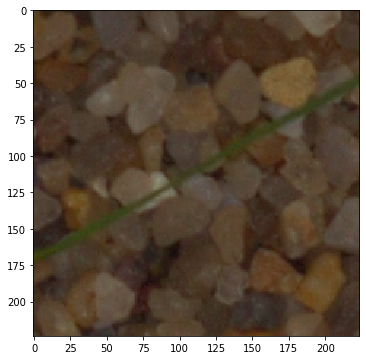

torch.Size([224, 224, 3])

In [11]:
link = "/Users/jlakkis/Desktop/Temporary Files/CIS 520 Project/data/test"
testset = tgenerator(link)

"""Get a clean image, and then get the same image but corrupted
    via patch swapping"""

i = np.random.choice(list(range(len(testset))))
testset.setmode_none()
image = testset[i]

plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.show()
type(np.asarray(image))
image.shape

In [12]:
testset.viewmode()

In [13]:
for i in range(794):
    im = testset[i]
    imnew = im.view(-1,im.shape[0] * im.shape[1] * im.shape[2])
    imnew = np.asarray(imnew)
    z = myPCA.transform(imnew)
    ytest = clf.predict(z)
    
    if(i % 100 ==0):
        print(i)
    
    df_['file'][i] = testset.list_IDs[i]
    df_['species'][i] = dataset.classes[int(ytest)]
    
df_.to_csv(path_or_buf = "/Users/jlakkis/Desktop/predictions.csv", index = False)

0


/Users/jlakkis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/jlakkis/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


100
200
300
400
500
600
700


In [14]:
testset.setmode_uniformnoise(theta=0.6)

for i in range(794):
    im = testset[i]
    imnew = im.view(-1,im.shape[0] * im.shape[1] * im.shape[2])
    imnew = np.asarray(imnew)
    z = myPCA.transform(imnew)
    ytest = clf.predict(z)
    
    if(i % 100 ==0):
        print(i)
    
    df_['file'][i] = testset.list_IDs[i]
    df_['species'][i] = dataset.classes[int(ytest)]
    
df_.to_csv(path_or_buf = "/Users/jlakkis/Desktop/predictionsunoise.csv", index = False)

0
100
200
300
400
500
600
700


In [15]:
testset.setmode_noiseypatch(theta=0.1,p=30,n=40)

for i in range(794):
    im = testset[i]
    imnew = im.view(-1,im.shape[0] * im.shape[1] * im.shape[2])
    imnew = np.asarray(imnew)
    z = myPCA.transform(imnew)
    ytest = clf.predict(z)
    
    if(i % 100 ==0):
        print(i)
    
    df_['file'][i] = testset.list_IDs[i]
    df_['species'][i] = dataset.classes[int(ytest)]
    
df_.to_csv(path_or_buf = "/Users/jlakkis/Desktop/predictionsnoiseypatch.csv", index = False)

0
100
200
300
400
500
600
700


In [16]:
testset.setmode_patchswap(p=20, n=50)

for i in range(794):
    im = testset[i]
    imnew = im.view(-1,im.shape[0] * im.shape[1] * im.shape[2])
    imnew = np.asarray(imnew)
    z = myPCA.transform(imnew)
    ytest = clf.predict(z)
    
    if(i % 100 ==0):
        print(i)
    
    df_['file'][i] = testset.list_IDs[i]
    df_['species'][i] = dataset.classes[int(ytest)]
    
df_.to_csv(path_or_buf = "/Users/jlakkis/Desktop/predictionspatchswap.csv", index = False)

0
100
200
300
400
500
600
700


In [17]:
link = "/Users/jlakkis/Desktop/Temporary Files/CIS 520 Project/data/texturized"
testset = tgenerator(link)
testset.viewmode()

for i in range(794):
    im = testset[i]
    imnew = im.view(-1,im.shape[0] * im.shape[1] * im.shape[2])
    imnew = np.asarray(imnew)
    z = myPCA.transform(imnew)
    ytest = clf.predict(z)
    
    if(i % 100 ==0):
        print(i)
    
    df_['file'][i] = testset.list_IDs[i]
    df_['species'][i] = dataset.classes[int(ytest)]
    
df_.to_csv(path_or_buf = "/Users/jlakkis/Desktop/predictionstexturized.csv", index = False)

0
100
200
300
400
500
600
700
